<a href="https://colab.research.google.com/github/Darshan235/ML/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Salary_dataset.csv')

print("First 5 rows of the dataset:")
display(df.head())

print("\nLast 5 rows of the dataset:")
display(df.tail())

First 5 rows of the dataset:


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0



Last 5 rows of the dataset:


,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


In [3]:
print(df.columns.tolist())

['Unnamed: 0', 'YearsExperience', 'Salary']


In [4]:
X = df[['YearsExperience']]
y = df['Salary']

print("Independent variable (X - YearsExperience):")
display(X.head())

print("\nDependent variable (y - Salary):")
display(y.head())

Independent variable (X - YearsExperience):


,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3



Dependent variable (y - Salary):


,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0


In [5]:
import pandas as pd

# Load the dataset (necessary because previous cell was not executed)
df = pd.read_csv('/content/Salary_dataset.csv')

# Separate the independent variable (YearsExperience) and the dependent variable (Salary)
X = df[['YearsExperience']]
y = df['Salary']

print("Independent variable (X - YearsExperience):")
display(X.head())

print("\nDependent variable (y - Salary):")
display(y.head())

Independent variable (X - YearsExperience):


,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3



Dependent variable (y - Salary):


,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0


In [6]:
X = X.values
y = y.values

print("First 5 elements of independent variable (X) as NumPy array:")
print(X[:5])

print("\nFirst 5 elements of dependent variable (y) as NumPy array:")
print(y[:5])

First 5 elements of independent variable (X) as NumPy array:
[[1.2]
 [1.4]
 [1.6]
 [2.1]
 [2.3]]

First 5 elements of dependent variable (y) as NumPy array:
[39344. 46206. 37732. 43526. 39892.]


In [7]:
print(f"Original shape of X: {X.shape}")
print(f"Original shape of y: {y.shape}")

y = y.reshape(-1, 1)

print(f"New shape of y after reshaping: {y.shape}")

Original shape of X: (30, 1)
Original shape of y: (30,)
New shape of y after reshaping: (30, 1)


In [8]:
from sklearn.preprocessing import StandardScaler

# Instantiate a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the independent variable X and transform it
X = scaler.fit_transform(X)

print("First 5 rows of the normalized independent variable (X):")
print(X[:5])

First 5 rows of the normalized independent variable (X):
[[-1.51005294]
 [-1.43837321]
 [-1.36669348]
 [-1.18749416]
 [-1.11581443]]


In [9]:
import numpy as np

# Initialize slope (m) and intercept (c)
m = 0.0
c = 0.0

print(f"Initial Slope (m): {m}")
print(f"Initial Intercept (c): {c}")

Initial Slope (m): 0.0
Initial Intercept (c): 0.0


In [10]:
# Prediction equation: y_pred = m*X + c
def predict(X, m, c):
    return m * X + c

# Test the prediction function with initial parameters
y_pred_initial = predict(X, m, c)
print("First 5 initial predictions (y_pred_initial):")
print(y_pred_initial[:5])

First 5 initial predictions (y_pred_initial):
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [11]:
# Cost function (Mean Squared Error - MSE)
def compute_cost(y_true, y_pred):
    n = len(y_true)
    cost = np.sum((y_pred - y_true)**2) / (2*n) # Using 2n for consistency with common gradient descent formulations
    return cost

In [12]:
# Calculate initial cost with m=0, c=0
initial_cost = compute_cost(y, y_pred_initial)
print(f"Initial Cost (MSE) with m={m}, c={c}: {initial_cost}")

Initial Cost (MSE) with m=0.0, c=0.0: 3251553638.866667


In [13]:
# Function to compute gradients
def compute_gradients(X, y_true, y_pred):
    n = len(y_true)
    # Gradient with respect to slope (m)
    dm = np.sum((y_pred - y_true) * X) / n
    # Gradient with respect to intercept (c)
    dc = np.sum(y_pred - y_true) / n
    return dm, dc

In [14]:
# Compute initial gradients
dm_initial, dc_initial = compute_gradients(X, y, y_pred_initial)
print(f"Initial Gradient for Slope (dm): {dm_initial}")
print(f"Initial Gradient for Intercept (dc): {dc_initial}")

Initial Gradient for Slope (dm): -26367.182443542457
Initial Gradient for Intercept (dc): -76004.0


In [15]:
def gradient_descent(X, y, m, c, learning_rate, num_iterations):
    cost_history = []

    for i in range(num_iterations):
        # 1. Make predictions
        y_pred = predict(X, m, c)

        # 2. Compute cost and store it
        cost = compute_cost(y, y_pred)
        cost_history.append(cost)

        # 3. Compute gradients
        dm, dc = compute_gradients(X, y, y_pred)

        # 4. Update parameters
        m = m - learning_rate * dm
        c = c - learning_rate * dc

    return m, c, cost_history

In [16]:
# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

print(f"Starting Gradient Descent with:\n  Learning Rate: {learning_rate}\n  Iterations: {num_iterations}")

# Run Gradient Descent
m_optimized, c_optimized, cost_history = gradient_descent(X, y, m, c, learning_rate, num_iterations)

print(f"\nOptimized Slope (m): {m_optimized}")
print(f"Optimized Intercept (c): {c_optimized}")
print(f"Final Cost (MSE): {cost_history[-1]}")


Starting Gradient Descent with:
  Learning Rate: 0.01
  Iterations: 1000

Optimized Slope (m): 26366.044139385645
Optimized Intercept (c): 76000.7188125118
Final Cost (MSE): 15635482.014557313


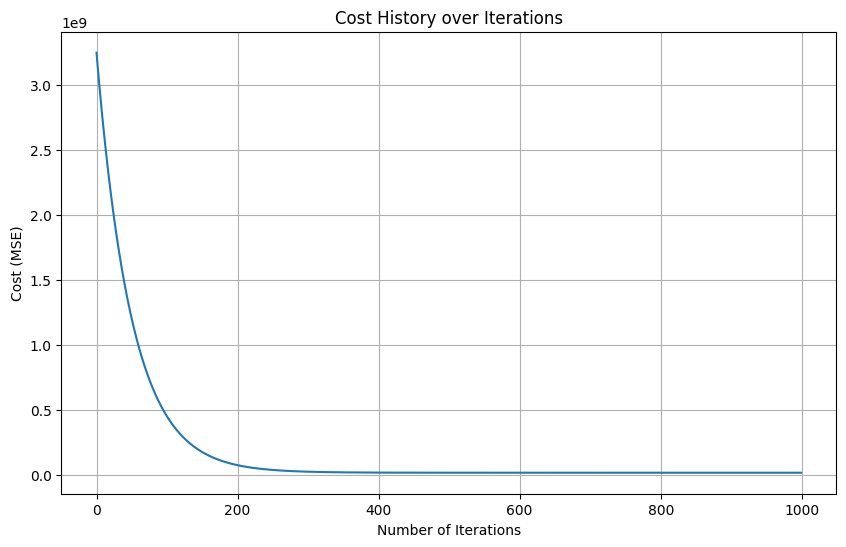

In [17]:
import matplotlib.pyplot as plt

# Plot the cost history
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost History over Iterations')
plt.grid(True)
plt.show()

In [18]:
# Make final predictions using the optimized parameters
y_pred_final = predict(X, m_optimized, c_optimized)

print("First 5 final predictions (y_pred_final):")
print(y_pred_final[:5])

First 5 final predictions (y_pred_final):
[[36186.59646431]
 [38076.50733527]
 [39966.41820623]
 [44691.19538363]
 [46581.10625459]]


In [19]:
# Calculate the final cost (MSE) with the optimized parameters
final_mse = compute_cost(y, y_pred_final)

print(f"Final Mean Squared Error (MSE): {final_mse}")

Final Mean Squared Error (MSE): 15635481.892104326


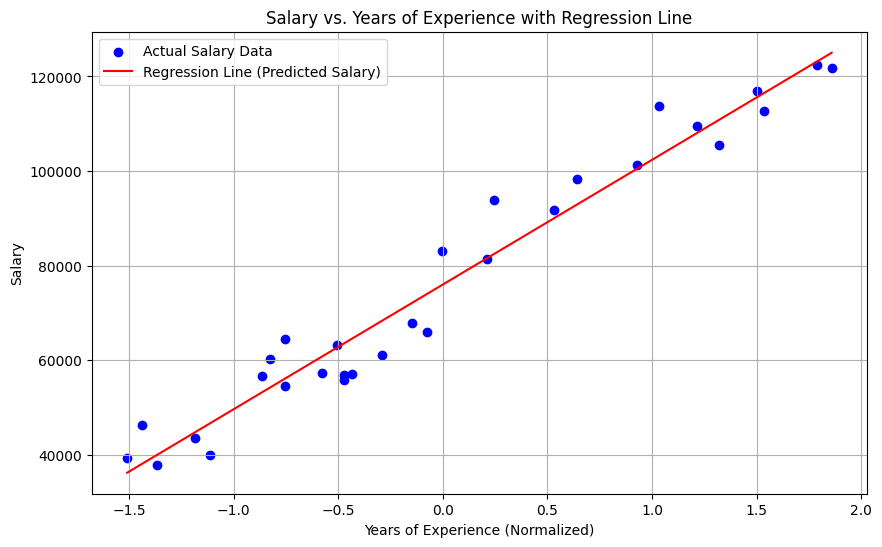

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Salary Data')
plt.plot(X, y_pred_final, color='red', label='Regression Line (Predicted Salary)')
plt.title('Salary vs. Years of Experience with Regression Line')
plt.xlabel('Years of Experience (Normalized)')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()